In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

filling point: (0,0)
[[0 0]
 [0 1]
 [1 0]] added for point (0,0)
filling point: (0,2)
[[0 0]
 [1 0]
 [1 1]
 [1 2]] added for point (0,2)
filling point: (0,3)
[[0 0]
 [0 1]
 [0 2]
 [1 2]
 [1 3]] added for point (0,3)
filling point: (0,6)
[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [1 1]] added for point (0,6)
filling point: (0,10)
filling point: (1,1)
filling point: (1,8)
filling point: (1,9)
[[ 0  0]
 [ 1  0]
 [ 1 -1]
 [ 2 -1]
 [ 2 -2]] added for point (1,9)
filling point: (1,10)
filling point: (2,0)
filling point: (2,1)
[[ 0  0]
 [ 1  0]
 [ 0 -1]
 [-1  0]
 [ 0  1]] added for point (2,1)
filling point: (2,3)
[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [2 0]] added for point (2,3)
filling point: (2,6)
filling point: (2,7)
filling point: (2,10)
filling point: (3,0)
filling point: (3,2)
filling point: (3,4)
[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]] added for point (3,4)
filling point: (3,9)
[[0 0]
 [0 1]
 [1 0]
 [1 1]] added for point (3,9)
filling point: (4,0)
filling point: (4,1)
filling point: (4,2)
filling point: (4,6)


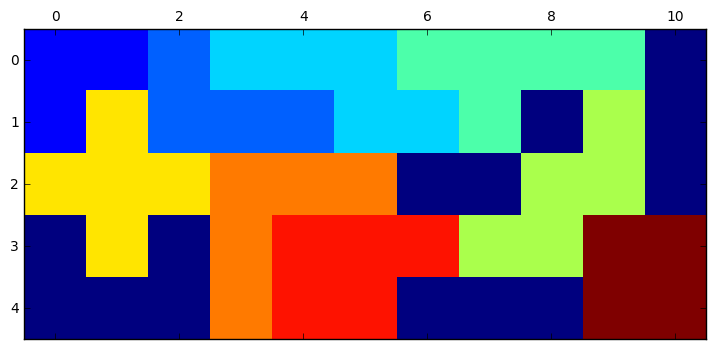

In [31]:
data = {
    'colors': {
        0: 'black',
        1: 'darkorange',
        2: 'purple',
        3: 'beige',
        4: 'red',
        5: 'gray',
        6: 'lime',
        7: 'yellow',
        8: 'blue',
        9: 'skyblue',
        10: 'moccasin',
        11: 'pink',
        12: 'green'
    }
}

def render(shapes):
    field = np.zeros(5*11)
    field.shape = (5, 11)
    index = 1
    for shape in shapes:
        for p in shape:
            field[p[0], p[1]] = index
        index += 1
    plt.matshow(field)  
    # s = np.ones(8)*3000
    # c = [data['colors'][t] for t in range(13)]
    # plt.scatter(data['field'], data['field'], s=s, c=c, alpha=0.8)
    # plt.grid(True)
    

shapes = [
    np.array([[0,0],[0,1],[1,0]]),
    np.array([[0,0],[1,0],[1,1],[1,2]]),
    np.array([[0,0],[0,-1],[-1,0],[0,1],[1,0]]),
    np.array([[0,0],[0,1],[0,2],[0,3],[1,1]]),
    np.array([[0,0],[0,1],[1,1],[1,2],[2,2]]),
    np.array([[0,0],[0,1],[0,2],[1,2],[1,3]]),
    np.array([[0,0],[0,1],[0,2],[0,3],[1,0]]),
    np.array([[0,0],[0,1],[0,2],[0,3]]),
    np.array([[0,0],[0,1],[0,2],[1,0],[1,1]]),
    np.array([[0,0],[0,1],[0,2],[1,0],[1,2]]),
    np.array([[0,0],[0,1],[1,0],[1,1]]),
    np.array([[0,0],[0,1],[0,2],[1,0],[2,0]])
]

def rotate_right(shape):
    transform(shape, [[0,1],[-1,0]])

def rotate_left(shape):
    transform(shape, [[0,-1],[1,0]])

def flip(shape):
    transform(shape, [[1,0],[0,-1]])

def move_down(shape, step=1):
    for i in range(len(shape)):
        shape[i] = shape[i] + [step,0]

def move_up(shape, step=1):
    for i in range(len(shape)):
        shape[i] = shape[i] - [step,0]
        
def move_right(shape, step=1):
    for i in range(len(shape)):
        shape[i] = shape[i] + [0,1]
        
def move_left(shape, step=1):
    for i in range(len(shape)):
        shape[i] = shape[i] - [0,1]
             
def transform(shape, M_def_t):
    M = np.array(M_def_t).transpose()
    for i in range(len(shape)):
        shape[i] = M.dot(shape[i])
        
def is_inside_field(i, j, shape):
    for point in shape:
        px = point[0]+i
        py = point[1]+j
        if 0 <= px < 5 and 0 <= py < 11:
            pass
        else:
            return False
    return True


def all_points_are_free(i, j, shape, field):
    for point in shape:
        px = point[0]+i
        py = point[1]+j
        if field[px, py] != 0:
            return False
    return True

def add_shape(i, j, shape, field):
    val = field.max()+1
    for point in shape:
        px = point[0]+i
        py = point[1]+j
        field[px, py] = val
    print('{} added for point ({},{})'.format(shape, i,j))

def try_to_fill_point(i, j, shapes, field):
    print('filling point: ({},{})'.format(i,j))
    for k in range(len(shapes)):
        shape = shapes[k]
        if is_inside_field(i, j, shape):
            if all_points_are_free(i, j, shape, field):
                add_shape(i, j, shape, field)
                shapes.pop(k)
                break
        else:
            rotate_right(shape)
            k -= 1

                
            

def solve(shapes):
    field = np.zeros(5*11)
    field.shape = (5, 11)
    
    for i in range(5):
        for j in range(11):
            if field[i,j] == 0:
                try_to_fill_point(i, j, shapes, field)
                

    plt.matshow(field)

solve(shapes)
